In [42]:
import qiskit as q
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from matplotlib import style
import math
from qiskit import Aer, QuantumCircuit, execute, transpile, assemble, IBMQ
from qiskit.providers.ibmq import least_busy

In [9]:
qc=QuantumCircuit(2,2)
qc.ry(math.pi/4, 0)
qc.ry(math.pi/4, 1)
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
orig_state=svsim.run(transpile(qc,svsim)).result().get_statevector()
qc.measure([0,1],[0,1])
qc.draw()

┌─────────┐ statevector ┌─┐   
q_0: ┤ Ry(π/4) ├──────░──────┤M├───
     ├─────────┤      ░      └╥┘┌─┐
q_1: ┤ Ry(π/4) ├──────░───────╫─┤M├
     └─────────┘      ░       ║ └╥┘
c: 2/═════════════════════════╩══╩═
                              0  1

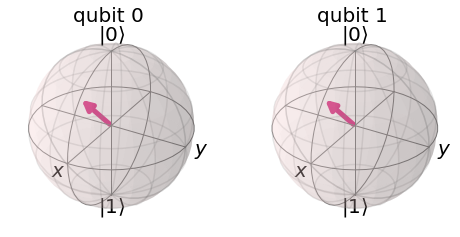

In [10]:
plot_bloch_multivector(orig_state)

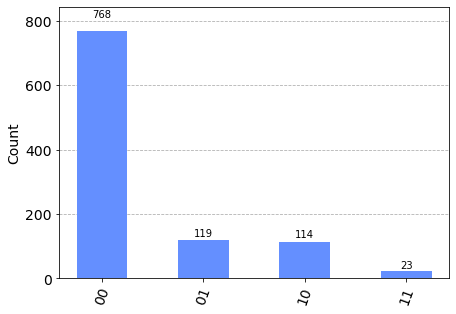

In [11]:
plot_histogram(svsim.run(qc).result().get_counts())

In [12]:
qc=QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.ry(math.pi/4, 0)
qc.ry(math.pi/4, 1)
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
h_state=svsim.run(transpile(qc,svsim)).result().get_statevector()
qc.measure([0,1],[0,1])
qc.draw()

┌───┐┌─────────┐ statevector ┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├──────░──────┤M├───
     ├───┤├─────────┤      ░      └╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├──────░───────╫─┤M├
     └───┘└─────────┘      ░       ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1

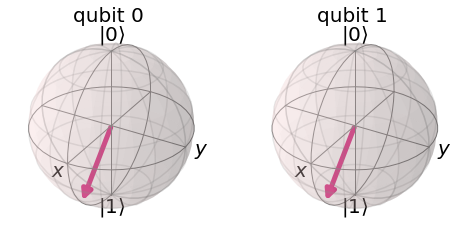

In [13]:
plot_bloch_multivector(h_state)

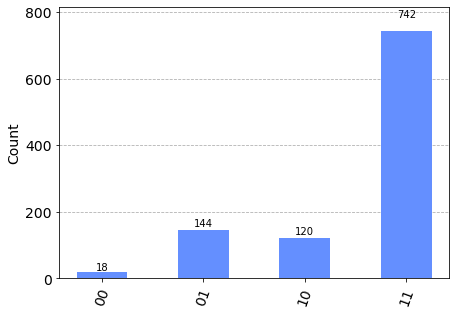

In [14]:
plot_histogram(svsim.run(qc).result().get_counts())

# Hadamard Sandwich on uncertain qubits

In [15]:
qc=QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.ry(math.pi/4, 0)
qc.ry(math.pi/4, 1)
qc.h(1)
qc.h(0)
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
hh_state=svsim.run(transpile(qc,svsim)).result().get_statevector()
qc.measure([0,1],[0,1])
qc.draw()


┌───┐┌─────────┐┌───┐ statevector ┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├┤ H ├──────░──────┤M├───
     ├───┤├─────────┤├───┤      ░      └╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├┤ H ├──────░───────╫─┤M├
     └───┘└─────────┘└───┘      ░       ║ └╥┘
c: 2/═══════════════════════════════════╩══╩═
                                        0  1

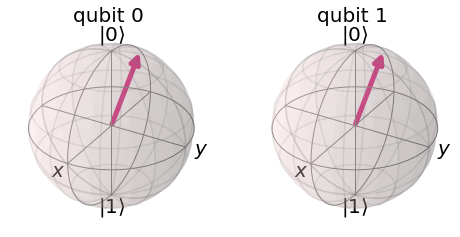

In [16]:
plot_bloch_multivector(hh_state)

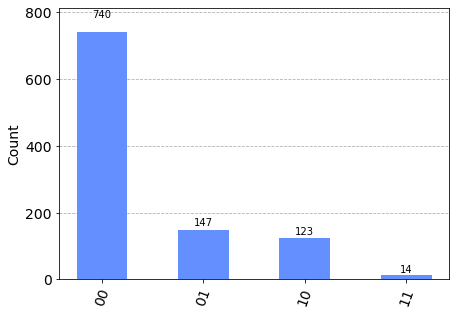

In [17]:
plot_histogram(svsim.run(qc).result().get_counts())

In [36]:
def balanced_black_box(c):
    c.cx(0,2)
    c.cx(1,2)
    return c
    
def constant_black_box(c):
    return c

In [37]:
qc=QuantumCircuit(3,2)
qc.x(2)
qc.h(0)
qc.h(1)
qc.h(2)
qc.barrier()
qc = balanced_black_box(qc)
qc.barrier()
qc.h(0)
qc.h(1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐      ░            ░ ┌───┐┌─┐   
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├───
     ├───┤      ░   │        ░ ├───┤└╥┘┌─┐
q_1: ┤ H ├──────░───┼────■───░─┤ H ├─╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║  ║ 
c: 2/════════════════════════════════╩══╩═
                                     0  1

In [38]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
dj_state=svsim.run(transpile(qc,svsim)).result().get_statevector()

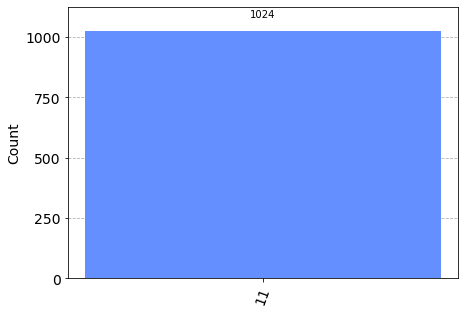

In [40]:
#aer_sim = Aer.get_backend('aer_simulator')
#results=aer_sim.run(qc).result()
#answer=results.get_counts()

#plot_histogram(answer)

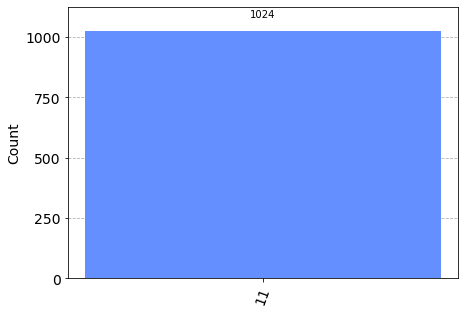

In [39]:
plot_histogram(svsim.run(qc).result().get_counts())

In [44]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'